## **IPL Prediction System - Machine Learning (CACSC17)**

By:
1.   Pranay Kothari (2019UCS2033)
2.   Anureet Kaur (2019UCS2037)
3.  Deepak Chopra (2019UCS2038)
4.  Manjot Singh (2019UCS2054)

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

**Reading the CSV of IPL Matches**

In [ ]:
match_df=pd.read_csv('IPL Matches 2008-2020.csv')

In [ ]:
print(match_df)

          id        city        date  ... method      umpire1         umpire2
0     335982   Bangalore  2008-04-18  ...    NaN    Asad Rauf     RE Koertzen
1     335983  Chandigarh  2008-04-19  ...    NaN    MR Benson      SL Shastri
2     335984       Delhi  2008-04-19  ...    NaN    Aleem Dar  GA Pratapkumar
3     335985      Mumbai  2008-04-20  ...    NaN     SJ Davis       DJ Harper
4     335986     Kolkata  2008-04-20  ...    NaN    BF Bowden     K Hariharan
..       ...         ...         ...  ...    ...          ...             ...
811  1216547       Dubai  2020-09-28  ...    NaN  Nitin Menon      PR Reiffel
812  1237177       Dubai  2020-11-05  ...    NaN  CB Gaffaney     Nitin Menon
813  1237178   Abu Dhabi  2020-11-06  ...    NaN   PR Reiffel          S Ravi
814  1237180   Abu Dhabi  2020-11-08  ...    NaN   PR Reiffel          S Ravi
815  1237181       Dubai  2020-11-10  ...    NaN  CB Gaffaney     Nitin Menon

[816 rows x 17 columns]


In [ ]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


**Reading the CSV of IPL Ball by Ball**

In [ ]:
delv_df=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [ ]:
delv_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
delv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [ ]:
match_df['winner']

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [ ]:
match_df['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
match_df['team1'].value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiant           7
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team1, dtype: int64

In [ ]:
match_df['winner']

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [ ]:
match_df['winner'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
811    False
812    False
813    False
814    False
815    False
Name: winner, Length: 816, dtype: bool

In [ ]:
rs=len(match_df['winner'])

In [ ]:
match_df['winner'].isnull()[0]

False

In [ ]:
for i in range(rs):
    if match_df['winner'].isnull()[i]==True:
        match_df=match_df.drop(i)

In [ ]:
print(len(match_df['winner']))     

812


In [ ]:
match_df[match_df['winner'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               812 non-null    int64  
 1   city             799 non-null    object 
 2   date             812 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            812 non-null    object 
 5   neutral_venue    812 non-null    int64  
 6   team1            812 non-null    object 
 7   team2            812 non-null    object 
 8   toss_winner      812 non-null    object 
 9   toss_decision    812 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          812 non-null    object 
 16  umpire2          812 non-null    object 
dtypes: float64(1), i

**Converting into Categorical Data**

In [ ]:
team_encodings={
    'Mumbai Indians':1,
    'Kolkata Knight Riders':2,
    'Royal Challengers Bangalore':3,
    'Deccan Chargers':4,
    'Chennai Super Kings':5,
    'Rajasthan Royals':6,
    'Delhi Daredevils':7,
    'Gujarat Lions':8,
    'Kings XI Punjab':9,
    'Sunrisers Hyderabad':10,
    'Rising Pune Supergiants':11,
    'Rising Pune Supergiant':11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors':13,
    'Delhi Capitals':14,
    "Draw":15
}

teams_list=[
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Royal Challengers Bangalore',
    'Deccan Chargers',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Daredevils',
    'Gujarat Lions',
    'Kings XI Punjab',
    'Sunrisers Hyderabad',
    'Rising Pune Supergiants',
    'Kochi Tuskers Kerala',
    'Pune Warriors',
    'Delhi Capitals']

team_encode_dict={
    'team1':team_encodings,
    'team2':team_encodings,
    'toss_winner':team_encodings,
    'winner':team_encodings
}

In [ ]:
match_df.replace(team_encode_dict,inplace=True)

In [ ]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,2,4,4,bat,2,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               812 non-null    int64  
 1   city             799 non-null    object 
 2   date             812 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            812 non-null    object 
 5   neutral_venue    812 non-null    int64  
 6   team1            812 non-null    int64  
 7   team2            812 non-null    int64  
 8   toss_winner      812 non-null    int64  
 9   toss_decision    812 non-null    object 
 10  winner           812 non-null    int64  
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          812 non-null    object 
 16  umpire2          812 non-null    object 
dtypes: float64(1), i

**Text Preprocessing and Data Analysis**

In [ ]:
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
Bengaluru          14
Visakhapatnam      13
Sharjah            12
Centurion          12
Ahmedabad          12
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Cuttack             7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               812 non-null    int64  
 1   city             799 non-null    object 
 2   date             812 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            812 non-null    object 
 5   neutral_venue    812 non-null    int64  
 6   team1            812 non-null    int64  
 7   team2            812 non-null    int64  
 8   toss_winner      812 non-null    int64  
 9   toss_decision    812 non-null    object 
 10  winner           812 non-null    int64  
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          812 non-null    object 
 16  umpire2          812 non-null    object 
dtypes: float64(1), i

In [ ]:
rs=len(match_df['city'])
print(rs)

812


In [ ]:
match_df[match_df['city'].isnull()==True]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,7,3,3,field,3,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,3,1,3,field,3,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,2,7,2,bat,7,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,6,9,9,field,9,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,9,10,10,field,9,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,6,5,6,field,5,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,3,2,3,field,2,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,10,7,10,bat,10,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,5,1,1,bat,5,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,7,1,1,bat,7,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [ ]:
print(type(match_df['venue'][417]))

<class 'str'>


In [ ]:
print(match_df['venue'][417].split(' ')[0])

Dubai


In [ ]:
match_df['city'].fillna(match_df['venue'],inplace=True)

In [ ]:
match_df.head(418)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,3,2,3,field,2,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,9,5,5,bat,5,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,7,6,6,bat,7,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,1,3,1,bat,3,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,2,4,4,bat,2,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,729311,Sharjah Cricket Stadium,2014-04-27,DR Smith,Sharjah Cricket Stadium,1,10,5,10,bat,5,wickets,5.0,N,NaN,AK Chaudhary,VA Kulkarni
415,729313,Dubai International Cricket Stadium,2014-04-28,Sandeep Sharma,Dubai International Cricket Stadium,1,9,3,9,field,9,wickets,5.0,N,NaN,BF Bowden,S Ravi
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,2,6,6,bat,6,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
417,729317,Dubai International Cricket Stadium,2014-04-30,B Kumar,Dubai International Cricket Stadium,1,1,10,1,field,10,runs,15.0,N,NaN,HDPK Dharmasena,M Erasmus


In [ ]:
match_df['venue'][417]

'Dubai International Cricket Stadium'

In [ ]:
match_df.describe()

,id,neutral_venue,team1,team2,toss_winner,winner,result_margin
count,8.120000e+02,812.000000,812.00000,812.000000,812.000000,812.000000,799.000000
mean,7.559630e+05,0.094828,5.62931,5.645320,5.559113,5.427340,17.321652
std,3.061363e+05,0.293157,3.49236,3.474737,3.474793,3.462092,22.068427
min,3.359820e+05,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,5.012268e+05,0.000000,3.00000,2.750000,2.000000,2.000000,6.000000
50%,7.292960e+05,0.000000,5.00000,5.000000,5.000000,5.000000,8.000000
75%,1.082626e+06,0.000000,9.00000,9.000000,8.250000,9.000000,19.500000
max,1.237181e+06,1.000000,14.00000,14.000000,14.000000,14.000000,146.000000


In [ ]:
toss_wins=match_df['toss_winner'].value_counts(sort=True)
match_wins=match_df['winner'].value_counts(sort=True)

In [ ]:
for index,val in toss_wins.iteritems():
  print(f"{list(team_encode_dict['winner'].keys())[index-1]} : {toss_wins[index]}")

Mumbai Indians : 106
Kolkata Knight Riders : 98
Chennai Super Kings : 97
Royal Challengers Bangalore : 86
Kings XI Punjab : 85
Rajasthan Royals : 85
Delhi Daredevils : 79
Sunrisers Hyderabad : 57
Deccan Chargers : 43
Pune Warriors : 20
Kochi Tuskers Kerala : 20
Gujarat Lions : 15
Rising Pune Supergiants : 13
Rising Pune Supergiant : 8


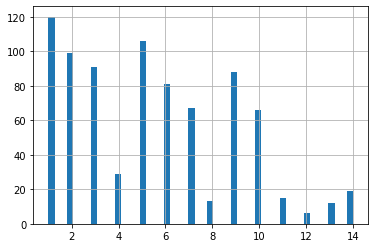

In [ ]:
match_df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match Winners')

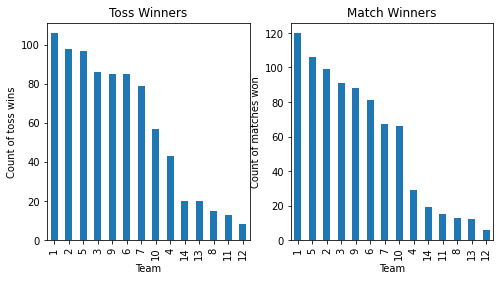

In [ ]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel("Count of toss wins")
ax1.set_title("Toss Winners")
toss_wins.plot(kind="bar")

ax2=fig.add_subplot(122)
match_wins.plot(kind="bar")
ax2.set_xlabel('Team')
ax2.set_ylabel("Count of matches won")
ax2.set_title("Match Winners")

In [ ]:
match_df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
dtype: int64

In [ ]:
match_df=match_df[['id','team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,335982,3,2,Bangalore,field,3,M Chinnaswamy Stadium,2
1,335983,9,5,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,335984,7,6,Delhi,bat,6,Feroz Shah Kotla,7
3,335985,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,335986,2,4,Kolkata,bat,4,Eden Gardens,2
...,...,...,...,...,...,...,...,...
811,1216547,3,1,Dubai,field,1,Dubai International Cricket Stadium,3
812,1237177,1,14,Dubai,field,14,Dubai International Cricket Stadium,1
813,1237178,3,10,Abu Dhabi,field,10,Sheikh Zayed Stadium,10
814,1237180,14,10,Abu Dhabi,bat,14,Sheikh Zayed Stadium,14


In [ ]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ["city","toss_decision",'venue']
encoder=LabelEncoder()
for ftr in ftr_list:
  match_df[ftr]=encoder.fit_transform(match_df[ftr])
  print(encoder.classes_)
match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Dubai International Cricket Stadium' 'Durban'
 'East London' 'Hyderabad' 'Indore' 'Jaipur' 'Johannesburg' 'Kanpur'
 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur' 'Port Elizabeth' 'Pune'
 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah' 'Sharjah Cricket Stadium'
 'Visakhapatnam']
['bat' 'field']
['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M.Chinnaswamy Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsuran

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,335982,3,2,2,1,3,14,2
1,335983,9,5,7,0,5,23,5
2,335984,7,6,10,0,6,8,7
3,335985,1,3,24,0,1,35,3
4,335986,2,4,23,0,4,7,2
...,...,...,...,...,...,...,...,...
811,1216547,3,1,12,1,1,6,3
812,1237177,1,14,12,1,14,6,1
813,1237178,3,10,0,1,10,30,10
814,1237180,14,10,0,0,14,30,14


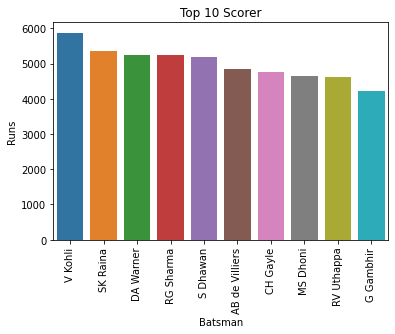

In [ ]:
import seaborn as sns

temp_df = delv_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).head(10).reset_index(drop=True)
sns.barplot(x=temp_df['batsman'],y=temp_df['batsman_runs'],data=temp_df)

plt.title("Top 10 Scorer")
plt.xticks(rotation=90)
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.show()

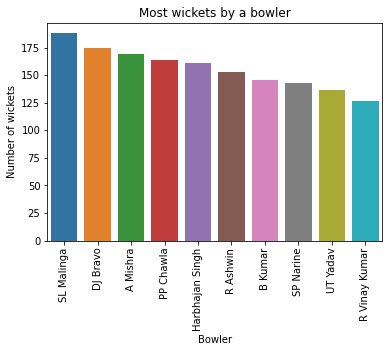

In [ ]:
temp_df = delv_df.groupby('bowler')['is_wicket'].agg('sum').reset_index().sort_values(by='is_wicket', ascending=False).reset_index(drop=True).head(10)
sns.barplot(x=temp_df['bowler'],y=temp_df['is_wicket'],data=temp_df)

plt.title("Most wickets by a bowler")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Number of wickets")
plt.show()

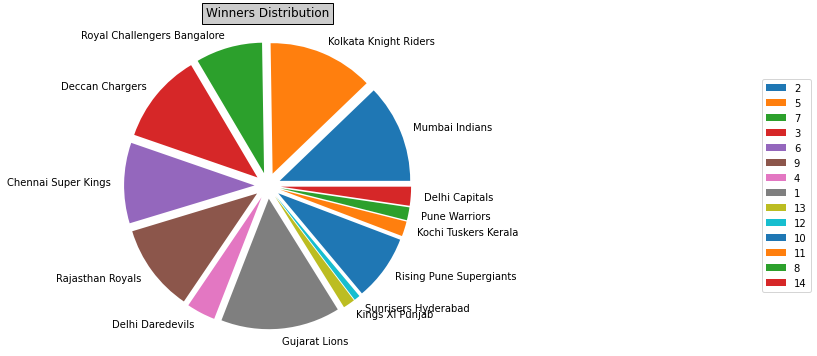

In [ ]:
from collections import Counter

topic_count = Counter(match_df['winner'])
numbers = [i for w,i in topic_count.items()]
explode = [0.1 for i in range(len(numbers))]
topics = [w for w,i in topic_count.items()]


fig,axs = plt.subplots(figsize=(12,6))
wedges, texts = axs.pie(x = numbers,explode=explode, labels = teams_list)
axs.legend(wedges, topics,loc="center left",bbox_to_anchor=(2, 0, 0.5, 1))
axs.set_title('Winners Distribution',bbox={'facecolor':'0.8'})
plt.show()

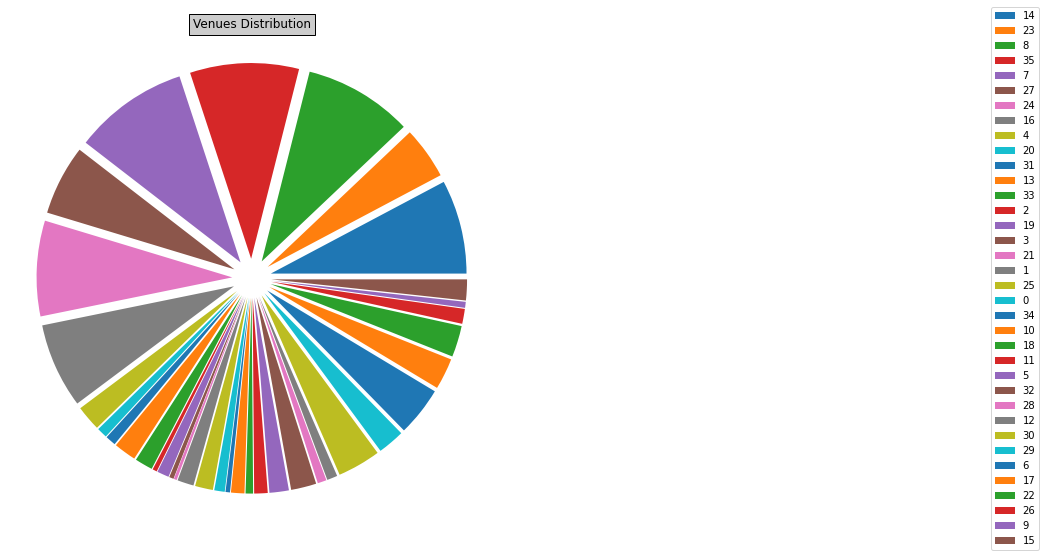

In [ ]:
topic_count = Counter(match_df['venue'])
numbers = [i for w,i in topic_count.items()]
explode = [0.1 for i in range(len(numbers))]
topics = [w for w,i in topic_count.items()]


fig,axs = plt.subplots(figsize=(18,9))
wedges, texts = axs.pie(x = numbers,explode=explode)
axs.legend(wedges, topics,loc="center left",bbox_to_anchor=(2, 0, 0.5, 1))
axs.set_title('Venues Distribution',bbox={'facecolor':'0.8'})
plt.show()

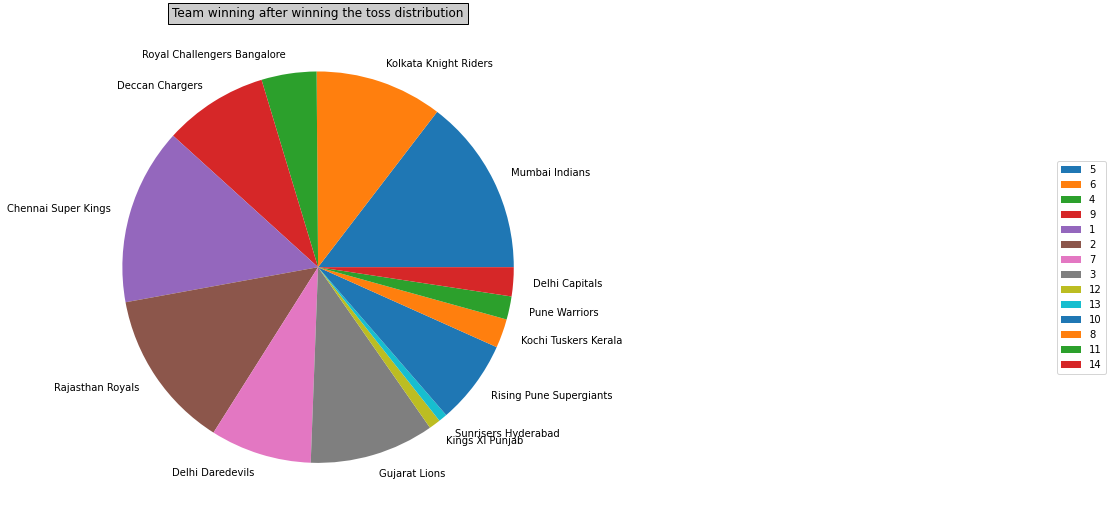

In [ ]:
match_df['que'] = np.where(match_df['winner'] == match_df['toss_winner'], True, False)

topic_count = Counter(match_df['winner'][match_df['que'] == True])
numbers = [i for w,i in topic_count.items()]
explode = [0.1 for i in range(len(numbers))]
topics = [w for w,i in topic_count.items()]

fig,axs = plt.subplots(figsize=(18,9))
wedges, texts = axs.pie(x = numbers, labels = teams_list)
axs.legend(wedges, topics,loc="center left",bbox_to_anchor=(2, 0, 0.5, 1))
axs.set_title('Team winning after winning the toss distribution',bbox={'facecolor':'0.8'})
plt.show()

In [ ]:
teams=match_df['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Wins'])

for id,element in enumerate(teams):
    temp_bat=match_df[(match_df['toss_winner']==element) & (match_df['toss_decision']=='bat')]
    temp_field=match_df[(match_df['toss_winner']==element) & (match_df['toss_decision']=='field')]
    
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Wins':temp_bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'field','Wins':temp_field['toss_winner'].count()},ignore_index=True)

decision_making.head(100)

,Toss Winner,Decision,Wins
0,3,bat,0
1,3,field,0
2,5,bat,0
3,5,field,0
4,6,bat,0
5,6,field,0
6,1,bat,0
7,1,field,0
8,4,bat,0
9,4,field,0


**Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df =train_test_split(match_df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(649, 9)
(163, 9)


**Importing Libraries for ML**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Function for model evaluation**

In [ ]:
def print_model_scores(model,data,predictor,target, teams_list):
  model.fit(data[predictor],data[target])
  predictions=model.predict(data[predictor])
  accuracy=accuracy_score(predictions,data[target])
  print("Accuracy : %s" %"{0:.2%}".format(accuracy))
  scores=cross_val_score(model,data[predictor],data[target],scoring="neg_mean_squared_error",cv=5)
  print("Cross-Validation Scores : {}".format(np.sqrt(-scores)))
  print(f"Average RMSE : {np.sqrt(-scores).mean()}")
  print(classification_report(data[target],predictions, target_names=teams_list))
  print("Confusion Matrix:")
  cm = metrics.confusion_matrix(data[target], predictions)
  print(cm)

**Logistic Regression**

In [ ]:
target_var=['winner']
predictor_var=['team1','team2','venue','toss_winner','city','toss_decision']
model=LogisticRegression()

print_model_scores(model,train_df,predictor_var,target_var, teams_list)

Accuracy : 28.35%
Cross-Validation Scores : [3.0407489  3.48954482 3.16713897 3.66060104 3.36765278]
Average RMSE : 3.3451373025382987
                             precision    recall  f1-score   support

             Mumbai Indians       0.32      0.39      0.35        87
      Kolkata Knight Riders       0.31      0.38      0.34        80
Royal Challengers Bangalore       0.27      0.32      0.30        71
            Deccan Chargers       0.00      0.00      0.00        25
        Chennai Super Kings       0.28      0.34      0.31        90
           Rajasthan Royals       0.26      0.28      0.27        69
           Delhi Daredevils       0.00      0.00      0.00        58
              Gujarat Lions       0.00      0.00      0.00        10
            Kings XI Punjab       0.29      0.43      0.35        67
        Sunrisers Hyderabad       0.25      0.29      0.27        55
    Rising Pune Supergiants       0.00      0.00      0.00         9
       Kochi Tuskers Kerala       0.

**Linear SVM**

In [ ]:
model = svm.SVC()
print_model_scores(model,train_df,predictor_var,target_var, teams_list)

Accuracy : 40.99%
Cross-Validation Scores : [3.38889589 3.7652255  3.50384404 3.71690525 4.03184994]
Average RMSE : 3.6813441255710764
                             precision    recall  f1-score   support

             Mumbai Indians       0.38      0.52      0.44        87
      Kolkata Knight Riders       0.39      0.51      0.44        80
Royal Challengers Bangalore       0.44      0.41      0.42        71
            Deccan Chargers       0.00      0.00      0.00        25
        Chennai Super Kings       0.51      0.41      0.45        90
           Rajasthan Royals       0.38      0.58      0.46        69
           Delhi Daredevils       0.31      0.47      0.37        58
              Gujarat Lions       0.00      0.00      0.00        10
            Kings XI Punjab       0.52      0.34      0.41        67
        Sunrisers Hyderabad       0.44      0.40      0.42        55
    Rising Pune Supergiants       0.00      0.00      0.00         9
       Kochi Tuskers Kerala       0.

**K Nearest Neighbours**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
print_model_scores(model,train_df,predictor_var,target_var, teams_list)

Accuracy : 61.94%
Cross-Validation Scores : [3.27695919 3.98072278 3.14153319 3.56478503 3.63019208]
Average RMSE : 3.518838454498249
                             precision    recall  f1-score   support

             Mumbai Indians       0.63      0.91      0.75        87
      Kolkata Knight Riders       0.58      0.74      0.65        80
Royal Challengers Bangalore       0.54      0.51      0.52        71
            Deccan Chargers       0.54      0.56      0.55        25
        Chennai Super Kings       0.67      0.66      0.66        90
           Rajasthan Royals       0.69      0.64      0.66        69
           Delhi Daredevils       0.54      0.43      0.48        58
              Gujarat Lions       0.75      0.30      0.43        10
            Kings XI Punjab       0.62      0.57      0.59        67
        Sunrisers Hyderabad       0.71      0.62      0.66        55
    Rising Pune Supergiants       0.57      0.44      0.50         9
       Kochi Tuskers Kerala       0.0

**Random Forest Classifier**

In [ ]:
model=RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df,predictor_var,target_var, teams_list)

Accuracy : 89.98%
Cross-Validation Scores : [3.19494794 3.36954688 3.22251693 3.31546493 3.59154908]
Average RMSE : 3.3388051510172554
                             precision    recall  f1-score   support

             Mumbai Indians       0.90      0.92      0.91        87
      Kolkata Knight Riders       0.90      0.88      0.89        80
Royal Challengers Bangalore       0.82      0.85      0.83        71
            Deccan Chargers       0.93      1.00      0.96        25
        Chennai Super Kings       0.90      0.94      0.92        90
           Rajasthan Royals       0.89      0.94      0.92        69
           Delhi Daredevils       0.90      0.78      0.83        58
              Gujarat Lions       1.00      0.80      0.89        10
            Kings XI Punjab       0.87      0.93      0.90        67
        Sunrisers Hyderabad       0.96      0.89      0.92        55
    Rising Pune Supergiants       1.00      0.89      0.94         9
       Kochi Tuskers Kerala       1.

**Declaring feature set and predicting the output based on Random Forest Classifier**

In [ ]:
team1="Mumbai Indians"
team2="Sunrisers Hyderabad"
toss_winner="Mumbai Indians"
inp=[team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1'] #['team1','team2','venue','toss_winner','city','toss_decision']
print(inp)
inp=np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The Winner would be : {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[1, 10, '14', 1, '2', '1']
[['1' '10' '14' '1' '2' '1']]
[1]
The Winner would be : Mumbai Indians


**More Data Analysis and Heat Map**

In [ ]:
pd.Series(index=predictor_var ,data=model.feature_importances_)

team1            0.201810
team2            0.261950
venue            0.144799
toss_winner      0.189298
city             0.134183
toss_decision    0.067961
dtype: float64

In [ ]:
match_df[match_df['winner']==match_df['toss_winner']]

,id,team1,team2,city,toss_decision,toss_winner,venue,winner,que
1,335983,9,5,7,0,5,23,5,True
8,335990,4,6,16,1,6,24,6,True
10,335992,3,6,2,1,6,14,6,True
12,335994,1,4,24,1,4,4,4,True
14,335996,3,5,2,0,5,14,5,True
...,...,...,...,...,...,...,...,...,...
804,1216540,3,2,31,0,3,29,3,True
806,1216542,10,9,12,0,10,6,10,True
807,1216543,14,6,12,0,14,6,14,True
813,1237178,3,10,0,1,10,30,10,True


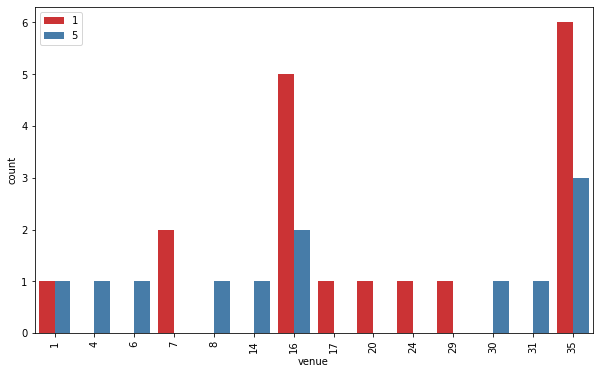

In [ ]:
team1=team_encodings['Mumbai Indians']
team2=team_encodings['Chennai Super Kings']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df["team2"]==team2))]
sns.countplot(x="venue",hue="winner",data=mtemp,palette="Set1")
plt.xticks(rotation='vertical')
lef=plt.legend(loc="upper left")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
batsman_grp=delv_df.groupby(['id','batting_team'])
batsmen=batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,id,batting_team,batsman_runs
0,335982,Kolkata Knight Riders,205
1,335982,Royal Challengers Bangalore,63
2,335983,Chennai Super Kings,234
3,335983,Kings XI Punjab,196
4,335984,Delhi Daredevils,122
...,...,...,...
1625,1237178,Sunrisers Hyderabad,122
1626,1237180,Delhi Capitals,181
1627,1237180,Sunrisers Hyderabad,166
1628,1237181,Delhi Capitals,152


In [ ]:
match=pd.read_csv("/content/IPL Matches 2008-2020.csv")
match=match[match['winner'].isnull() !=True]
teams=match.groupby(['id','team1','team2'])['winner'].sum().reset_index()
teams

,id,team1,team2,winner
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
807,1216547,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
808,1237177,Mumbai Indians,Delhi Capitals,Mumbai Indians
809,1237178,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
810,1237180,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals


In [ ]:
append_dict={'match_id':list(teams['id']),
             'team1':list(teams['team2']),
             'team2':list(teams['team1']),
             'team1_score':[],
             'team2_score':[],
             'winner':list(teams['winner']) 
            }

for id,team in zip(list(teams['id']),list(teams['team1'])):
  append_dict['team1_score'].append(int(batsmen.query('id == @id and batting_team == @team')['batsman_runs']))
for id,team in zip(list(teams['id']),list(teams['team2'])):
  append_dict['team2_score'].append(int(batsmen.query('id == @id and batting_team == @team')['batsman_runs']))

df=pd.DataFrame(append_dict)
df

,match_id,team1,team2,team1_score,team2_score,winner
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,63,205,Kolkata Knight Riders
1,335983,Chennai Super Kings,Kings XI Punjab,196,234,Chennai Super Kings
2,335984,Rajasthan Royals,Delhi Daredevils,122,122,Delhi Daredevils
3,335985,Royal Challengers Bangalore,Mumbai Indians,154,161,Royal Challengers Bangalore
4,335986,Deccan Chargers,Kolkata Knight Riders,84,100,Kolkata Knight Riders
...,...,...,...,...,...,...
807,1216547,Mumbai Indians,Royal Challengers Bangalore,191,196,Royal Challengers Bangalore
808,1237177,Delhi Capitals,Mumbai Indians,196,137,Mumbai Indians
809,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,127,122,Sunrisers Hyderabad
810,1237180,Sunrisers Hyderabad,Delhi Capitals,181,166,Delhi Capitals


In [ ]:
cols_to_use=match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'id', 'que', 'toss_decision', 'toss_winner', 'venue'], dtype='object')

In [ ]:
merged_df=pd.merge(df,match_df[cols_to_use],left_on="match_id",right_on='id')
merged_df=merged_df.dropna()
merged_df=merged_df.drop('id',axis=1)
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,que,toss_decision,toss_winner,venue
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,63,205,Kolkata Knight Riders,2,False,1,3,14
1,335983,Chennai Super Kings,Kings XI Punjab,196,234,Chennai Super Kings,7,True,0,5,23
2,335984,Rajasthan Royals,Delhi Daredevils,122,122,Delhi Daredevils,10,False,0,6,8
3,335985,Royal Challengers Bangalore,Mumbai Indians,154,161,Royal Challengers Bangalore,24,False,0,1,35
4,335986,Deccan Chargers,Kolkata Knight Riders,84,100,Kolkata Knight Riders,23,False,0,4,7
...,...,...,...,...,...,...,...,...,...,...,...
807,1216547,Mumbai Indians,Royal Challengers Bangalore,191,196,Royal Challengers Bangalore,12,False,1,1,6
808,1237177,Delhi Capitals,Mumbai Indians,196,137,Mumbai Indians,12,False,1,14,6
809,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,127,122,Sunrisers Hyderabad,0,True,1,10,30
810,1237180,Sunrisers Hyderabad,Delhi Capitals,181,166,Delhi Capitals,0,True,0,14,30


In [ ]:
def categorize(val):
  if val<50:
    return 1
  elif val>=20 and val<100:
    return 2
  elif val>=100 and val<150:
    return 3
  elif val>=150 and val<200:
    return 4
  else:
    return 5
cols=['team1_score','team2_score']
for col in cols:
  merged_df[col]=merged_df[col].apply(categorize)
merged_df

,match_id,team1,team2,team1_score,team2_score,winner,city,que,toss_decision,toss_winner,venue
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,2,5,Kolkata Knight Riders,2,False,1,3,14
1,335983,Chennai Super Kings,Kings XI Punjab,4,5,Chennai Super Kings,7,True,0,5,23
2,335984,Rajasthan Royals,Delhi Daredevils,3,3,Delhi Daredevils,10,False,0,6,8
3,335985,Royal Challengers Bangalore,Mumbai Indians,4,4,Royal Challengers Bangalore,24,False,0,1,35
4,335986,Deccan Chargers,Kolkata Knight Riders,2,3,Kolkata Knight Riders,23,False,0,4,7
...,...,...,...,...,...,...,...,...,...,...,...
807,1216547,Mumbai Indians,Royal Challengers Bangalore,4,4,Royal Challengers Bangalore,12,False,1,1,6
808,1237177,Delhi Capitals,Mumbai Indians,4,3,Mumbai Indians,12,False,1,14,6
809,1237178,Sunrisers Hyderabad,Royal Challengers Bangalore,3,3,Sunrisers Hyderabad,0,True,1,10,30
810,1237180,Sunrisers Hyderabad,Delhi Capitals,4,4,Delhi Capitals,0,True,0,14,30


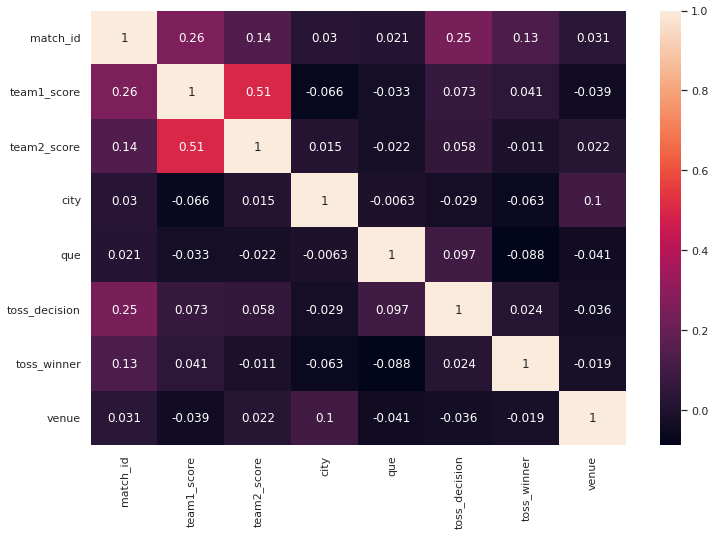

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax=sns.heatmap(merged_df.corr(),annot=True)